<a href="https://colab.research.google.com/github/jzambrano-xyz/ArtificialNeuralNetworks/blob/main/Ejemplos_de_uso_de_Redes_Neuronales_Artificiales_Julio_Zambrano_Data_Scientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación**

# Wine recognition dataset

**Planteamiento:**

El objetivo de este conjunto de datos es ofrecer tres conjuntos de datos de vino (*178 muestras en total*), con la intención de clasificarlos por **calidad** de acuerdo con sus características.

***Clasificación multiclase***

![](https://images.unsplash.com/photo-1568213816046-0ee1c42bd559?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=872&q=80)

**Metodología de solución**

Al ser un problema de clasificación multiclase, es necesario:


1.   Importar el conjunto de datos y las librerías de manipulación numérica, normalización y visualización necesarias.
2. Identificar el Target (variables a clasificar,  **y**) a partir de los demás datos del set de datos (**X**).

3. Crear un conjunto de pruebas y otro de entrenamiento con los datos de **X** e **y**.

4. Normalización de datos.

5. Definir el modelo de red neuronal y entrenarlo con los datos de entrenamiento.

6. Retar al modelo vs. los datos de prueba y obtener métricas de evaluación.

7. Generar un gráfico que soporte efectividad de la clasificación.



**1. Datos y librerías necesarias**

In [ ]:
#Conjunto de datos
from sklearn.datasets import load_wine
#Red neuronal clasificadora
from sklearn.neural_network import MLPClassifier
#Herramienta para crear conjuntos de prueba y entrenamiento
from sklearn.model_selection import train_test_split
#Escalador de datos
from sklearn.preprocessing import StandardScaler
#Manipulación numérica
import pandas as pd
#Gráficos para visualización de resultados
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

**2. Identificar variables a clasificar (*Target*), en este caso, las clases de vino (0, 1 y 2)**

In [ ]:
#Carga del dataset en una variable local para su descripción
wine_data = load_wine()
#Al describir el dataset es posible identificar el Target
wine_data

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [ ]:
#Pandas convierte los datos a un Dataframe para su manipulación numérica,
#se piden todos los datos del dataset, con las columnas descriptivas
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
#Se guardan en y los datos a clasificar (Target)
y = wine_data.target

**3. Generación de conjuntos de prueba y entrenamiento**

In [ ]:
#random_state indica a partir de qué dato se comenzará la aleatoriedad
#test_size indica la proporción de datos a utilizar en el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)

**4. Escalamiento de datos para su normalización**

In [ ]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

**5. Definición del modelo de red neuronal a utilizar**

In [ ]:
#Al definir la red neuronal se eligió utilizar 4 capas ocultas
#Cada una de las capas ocultas está definida en múltiplos de 12, porque se cuenta con 12 variables de entrada
#Como la clasificación tiene tres posibilidades, se dejan tres neuronas a la salida
#Se eligió la función de activación relu
#La función .fit comienza el entrenamiento
clf = MLPClassifier(hidden_layer_sizes=(12,144,288,3),activation="relu",random_state=1).fit(X_trainscaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


**6. Se reta al model con los datos de prueba y se obrienen métricas de evaluación**

In [ ]:
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.9722222222222222


**7. Generación de gráficos para verificar la efectividad de la red neuronal**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


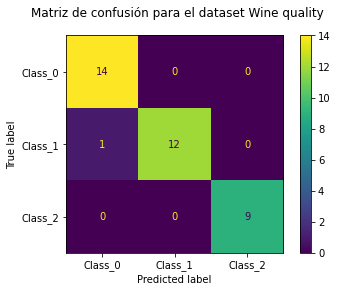

In [ ]:
#Se genera una Matriz de confusión como figura
#Se ingresan los nombres de las clases de acuerdo con el Target
fig=plot_confusion_matrix(clf, X_testscaled, y_test,display_labels=["Class_0","Class_1","Class_2"])
#Título superior para la matriz de confusión
fig.figure_.suptitle("Matriz de confusión para el dataset Wine quality")
plt.show()

**Conclusiones:**

Gracias al uso de una matriz de confusión es posible validar las clasificaciones realizadas por la red neuronal definida.

En este caso, solo se obtuvo una clasificación incorrecta para la clase 1, que fue indicada como clase 0.

# Breast cancer wisconsin (diagnostic) dataset

**Planteamiento:**

El objetivo de este conjunto de datos clasificar tumores mamarios entre malignos (**M**) y benignos (**B**) (*569 muestras en total*), con la intención de clasificarlos de acuerdo con sus características.

***Clasificación binaria***

![](https://images.unsplash.com/photo-1598884143267-586d90a32141?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Nnx8Y2FuY2VyfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=500&q=60)

**Metodología de solución**

Al ser un problema de clasificación binaria, es necesario:


1.   Importar el conjunto de datos y las librerías de manipulación numérica, normalización y visualización necesarias.

2. Identificar el Target (variables a clasificar,  **y**) a partir de los demás datos del set de datos (**X**).

3. Crear un conjunto de pruebas y otro de entrenamiento con los datos de **X** e **y**.

4. Normalización de datos.

5. Definir el modelo de red neuronal y entrenarlo con los datos de entrenamiento.

6. Retar al modelo vs. los datos de prueba y obtener métricas de evaluación.

7. Generar un gráfico que soporte efectividad de la clasificación.



**1. Datos y librerías necesarias**

In [ ]:
#Conjunto de datos
from sklearn.datasets import load_breast_cancer
#Red neuronal clasificadora
from sklearn.neural_network import MLPClassifier
#Herramienta para crear conjuntos de prueba y entrenamiento
from sklearn.model_selection import train_test_split
#Escalador de datos
from sklearn.preprocessing import StandardScaler
#Manipulación numérica
import pandas as pd
#Gráficos para visualización de resultados
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

**2. Identificar variables a clasificar (*Target*), en este caso, si la muestra es Maligna (1) o Benigna (0)**

In [ ]:
#Carga del dataset en una variable local para su descripción
cancer_data = load_breast_cancer()
#Al describir el dataset es posible identificar el Target
cancer_data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [ ]:
#Pandas convierte los datos a un Dataframe para su manipulación numérica,
#se piden todos los datos del dataset, con las columnas descriptivas
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
#Se guardan en y los datos a clasificar (Target)
y = cancer_data.target

**3. Generación de conjuntos de prueba y entrenamiento**

In [ ]:
#random_state indica a partir de qué dato se comenzará la aleatoriedad
#test_size indica la proporción de datos a utilizar en el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)

**4. Escalamiento de datos para su normalización**

In [ ]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

**5. Definición del modelo de red neuronal a utilizar**

In [ ]:
#Al definir la red neuronal se eligió utilizar 4 capas ocultas
#Cada una de las capas ocultas está definida en múltiplos de 30, porque se cuenta con 30 variables de entrada
#Como la salida es binaria, se dejan dos neuronas a la salida
#Se eligió la función de activación relu
#La función .fit comienza el entrenamiento
clf = MLPClassifier(hidden_layer_sizes=(30,150,300,2),activation="relu",random_state=1).fit(X_trainscaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


**6. Se reta al modelo con los datos de prueba y se obrienen métricas de evaluación**

In [ ]:
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.9736842105263158


**7. Generación de gráficos para verificar la efectividad de la red neuronal**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


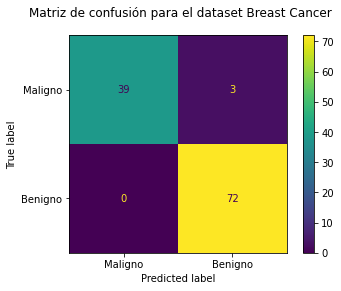

In [ ]:
#Se genera una Matriz de confusión como figura
#Se ingresan los nombres de las clases de acuerdo con el Target
fig=plot_confusion_matrix(clf, X_testscaled, y_test,display_labels=["Maligno","Benigno"])
#Título superior para la matriz de confusión
fig.figure_.suptitle("Matriz de confusión para el dataset Breast Cancer")
plt.show()

**Conclusiones:**

Gracias al uso de una matriz de confusión es posible validar las clasificaciones realizadas por la red neuronal definida.

En este caso, solo se obtuvieron tres clasificaciones incorrectas para la clase Maligno, que fueron indicadas como clase Benigno.

# Regresión

# Boston house prices dataset

**Planteamiento:**

El objetivo de este conjunto de datos es predecir el valor promedio de una vivienda en Boston (**MEDV**) a partir de factores como el índice delictivo o el número de escuelas en la cercanía(*506 muestras en total*).

***Regresión***

![](https://images.unsplash.com/photo-1583354344092-dcf7e164cab0?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MzF8fGJvc3RvbnxlbnwwfHwwfHw%3D&auto=format&fit=crop&w=500&q=60)

**Metodología de solución**

Al ser un problema de regresión, es necesario:


1.   Importar el conjunto de datos y las librerías de manipulación numérica, normalización y visualización necesarias.

2. Identificar el Target (variables a clasificar,  **y**) a partir de los demás datos del set de datos (**X**).

3. Crear un conjunto de pruebas y otro de entrenamiento con los datos de **X** e **y**.

4. Normalización de datos.

5. Definir el modelo de red neuronal y entrenarlo con los datos de entrenamiento.

6. Retar al modelo vs. los datos de prueba y obtener métricas de evaluación.

7. Generar un gráfico que soporte efectividad de la regresión.



**1. Datos y librerías necesarias**

In [ ]:
#Conjunto de datos
from sklearn.datasets import load_boston
#Red neuronal de regresión
from sklearn.neural_network import MLPRegressor
#Herramienta para crear conjuntos de prueba y entrenamiento
from sklearn.model_selection import train_test_split
#Escalador de datos
from sklearn.preprocessing import StandardScaler
#Manipulación numérica
import pandas as pd
#Gráficos para visualización de resultados
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

**2. Identificar variables a clasificar (*Target*), en este caso, el valor promedio de una cada (MEDV, en miles de dólares), de acuerdo con factores como el índice de criminalidad, el número de escuelas cercanas, etc.**

Un dato interesante alrededor de este dataset, es que Sci-kit Learn está por *descontinuarlo* debido a dos factores discriminatorios:

*  La variable **B** se refiere a la proporción de afrodescendientes por población, y

* La variable **LSTAT** se refiere al porcentaje de población de bajos recursos o *estatus* en la ciudad.

In [ ]:
#Carga del dataset en una variable local para su descripción
boston_data = load_boston()
#Al describir el dataset es posible identificar el Target
boston_data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
#Pandas convierte los datos a un Dataframe para su manipulación numérica,
#se piden todos los datos del dataset, con las columnas descriptivas
X = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
#Se guardan en y los datos a clasificar (Target)
y = boston_data.target

**3. Generación de conjuntos de prueba y entrenamiento**

In [ ]:
#random_state indica a partir de qué dato se comenzará la aleatoriedad
#test_size indica la proporción de datos a utilizar en el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)

**4. Escalamiento de datos para su normalización**

In [ ]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

**5. Definición del modelo de red neuronal a utilizar**

In [ ]:
#Al definir la red neuronal se eligió utilizar 4 capas ocultas
#Cada una de las capas ocultas está definida en múltiplos de 13, porque se cuenta con 13 variables de entrada
#Como la salida es un valor, se deja una neurona a la salida
#Se eligió la función de activación relu
#La función .fit comienza el entrenamiento
reg = MLPRegressor(hidden_layer_sizes=(13,130,650,130),activation="relu",random_state=1).fit(X_trainscaled, y_train)

**6. Se reta al modelo con los datos de prueba y se obrienen métricas de evaluación**

In [ ]:
y_pred=reg.predict(X_testscaled)
print(reg.score(X_testscaled, y_test))

0.9043683089424702


In [ ]:
y_pred

array([31.12316259, 19.86155884, 19.50223199, 21.15666846, 28.45034886,
       19.65011708, 27.77062901, 17.17673999, 23.21864243, 24.72676019,
       22.73496749, 23.9079436 , 17.91921793, 21.03807743, 19.61696203,
       30.23551007, 11.72901346, 49.16964484, 21.36413799, 13.17027799,
       18.4109541 , 16.35740035, 22.06239517, 23.69371359, 26.61203407,
       10.71712127, 12.17674505, 20.33772583, 37.48036001, 15.54229424,
       23.78782957, 16.41823739, 49.50799065, 16.20921497, 20.06912771,
       20.30899342, 14.70228656, 31.41496734, 14.46080462, 18.97735881,
       21.51716863, 23.41935808, 28.22499901, 15.22254489, 18.4037881 ,
       11.7492953 , 43.12509117, 17.67083372, 21.06956397, 15.8769266 ,
       19.15209792, 20.10194345, 26.81073093, 23.04308784, 13.51061005,
       23.9838498 , 11.24145506, 22.15476009, 15.78661252, 44.76410188,
       20.68571089, 27.16837627, 15.67736309, 15.83624492, 20.72506008,
       35.80574714, 46.1470516 , 19.25325456, 22.80957695, 20.43

**7. Generación de gráficos para verificar la efectividad de la red neuronal**

(array([ 9., 22., 35., 17.,  8.,  2.,  1.,  2.,  4.,  2.]),
 array([ 8.87101471, 13.4173451 , 17.96367548, 22.51000587, 27.05633626,
        31.60266665, 36.14899704, 40.69532743, 45.24165781, 49.7879882 ,
        54.33431859]),
 <a list of 10 Patch objects>)

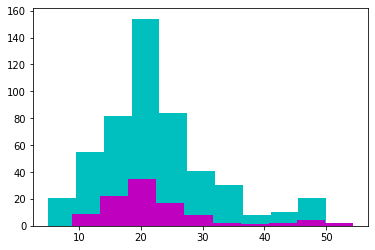

In [ ]:
#Se genera la gráfica
#y contiene los datos reales  sin normalizar
plt.hist(y, color = 'c')
#y_pred contiene las predicciones
plt.hist(y_pred, color = 'm')

**Conclusiones:**

La red neuronal obtuvo un 90% de efectividad en los datos no normalizados, devolviendo 102 predicciones para cada uno de los valores de **y**, a través del arreglo de datos guardado como **y_pred**.

# Combined Cycle Power Plant dataset

**Planteamiento:**

El objetivo de este conjunto de datos es predecir la producción de energía de una planta eléctrica (**PE**), a partir de indicadores como la temperatura ambiente, humedad relativa, etc.(*9568 muestras en total*).

***Regresión***

![](https://images.unsplash.com/photo-1585252155261-cff31944d781?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=774&q=80)

**Metodología de solución**

Al ser un problema de regresión, es necesario:


1.   Importar el conjunto de datos y las librerías de manipulación numérica, normalización y visualización necesarias.

2. Identificar el Target (variables a clasificar,  **y**) a partir de los demás datos del set de datos (**X**).

3. Crear un conjunto de pruebas y otro de entrenamiento con los datos de **X** e **y**.

4. Normalización de datos.

5. Definir el modelo de red neuronal y entrenarlo con los datos de entrenamiento.

6. Retar al modelo vs. los datos de prueba y obtener métricas de evaluación.

7. Generar un gráfico que soporte efectividad de la regresión.



**1. Datos y librerías necesarias**

In [ ]:
#Red neuronal de regresión
from sklearn.neural_network import MLPRegressor
#Herramienta para crear conjuntos de prueba y entrenamiento
from sklearn.model_selection import train_test_split
#Escalador de datos
from sklearn.preprocessing import StandardScaler
#Manipulación numérica
import pandas as pd
#Gráficos para visualización de resultados
import matplotlib.pyplot as plt

**2. Identificar variables a clasificar (*Target*), en este caso, la producción de energía (PE) de una planta eléctrica a partir de indicadores como la Temperatura y Humedad relativa.**

In [ ]:
#Carga del dataset en una variable local para su descripción
power_data = pd.read_excel('https://github.com/jzambrano-xyz/datasets/blob/main/Folds5x2_pp.xlsx?raw=true')
#Al describir el dataset es posible identificar el Target
power_data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [ ]:
#Pandas convierte los datos a un Dataframe para su manipulación numérica,
#se guardan en X todos los datos del dataset, menos la columna a predecir
XP = pd.DataFrame(power_data)
XP = XP.drop(['PE'], axis = 1)
XP

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [ ]:
#Se guardan en y los datos a clasificar (Target, 'PE')
yP = pd.DataFrame(power_data['PE'])
yP

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90
...,...
9563,460.03
9564,469.62
9565,429.57
9566,435.74


**3. Generación de conjuntos de prueba y entrenamiento**

In [ ]:
#random_state indica a partir de qué dato se comenzará la aleatoriedad
#test_size indica la proporción de datos a utilizar en el conjunto de prueba
XP_train, XP_test, yP_train, yP_test = train_test_split(XP,yP,random_state=1, test_size=0.2)

**4. Escalamiento de datos para su normalización**

In [ ]:
sc_XP = StandardScaler()
XP_trainscaled=sc_XP.fit_transform(XP_train)
XP_testscaled=sc_XP.transform(XP_test)

**5. Definición del modelo de red neuronal a utilizar**

In [ ]:
#Al definir la red neuronal se eligió utilizar 4 capas ocultas
#Cada una de las capas ocultas está definida en múltiplos de 4, porque se cuenta con 4 variables de entrada
#Se eligió la función de activación relu
#La función .fit comienza el entrenamiento
regP = MLPRegressor(hidden_layer_sizes=(4,44,44,44),activation="relu",random_state=1).fit(XP_trainscaled, yP_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


**6. Se reta al modelo con los datos de prueba y se obrienen métricas de evaluación**

In [ ]:
yP_pred=regP.predict(XP_testscaled)
print(regP.score(XP_testscaled, yP_test))

0.9112853446616066


In [ ]:
yP_pred

array([455.70118572, 463.81945773, 438.79493372, ..., 477.79629919,
       438.18650685, 465.50641334])

**7. Generación de gráficos para verificar la efectividad de la red neuronal**

Como las gráficas se sobreponen demasiado, en este caso se muestran separadas.

In [ ]:
yP

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90
...,...
9563,460.03
9564,469.62
9565,429.57
9566,435.74


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([420.26, 427.81, 435.36, 442.91, 450.46, 458.01, 465.56, 473.11,
        480.66, 488.21, 495.76]),
 <a list of 9568 Lists of Patches objects>)

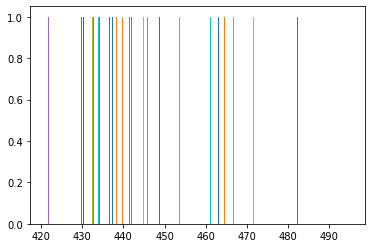

In [ ]:
#Se genera la gráfica
#yP contiene los datos reales
plt.hist(yP)

(array([ 17., 568., 316., 159., 159., 215., 223., 160.,  87.,  10.]),
 array([426.29243932, 433.55362761, 440.81481591, 448.0760042 ,
        455.3371925 , 462.59838079, 469.85956909, 477.12075738,
        484.38194568, 491.64313397, 498.90432227]),
 <a list of 10 Patch objects>)

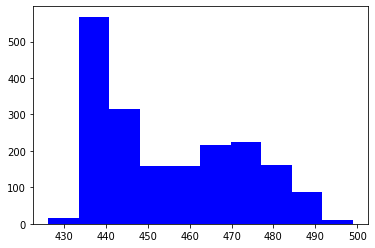

In [ ]:
#y_pred contiene las predicciones
plt.hist(yP_pred, color = 'b')

**Conclusiones:**

La red neuronal obtuvo un 91% de efectividad, devolviendo 9568 predicciones para cada uno de los valores de **y**, a través del arreglo de datos guardado como **y_pred**.